In [91]:
import csv
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda, Cropping2D, Dropout
from keras.layers.convolutional import Convolution2D
import sklearn
from sklearn.model_selection import train_test_split

In [92]:
ch, row, col = 3, 160, 320  # Image format

In [93]:
def crop_resize(image):
    # TODO: create a function that will take the image in crop and resize
    # Crop top and bottom 
    shape = image.shape
    image = image[math.floor(shape[0]/5):shape[0]-25, 0:shape[1]]
    # Resize to (64, 64) as shown by NVIDIA model
    image = cv2.resize(image, (64, 64), interpolation=cv2.INTER_AREA)
    return image

In [58]:
def flip_vertical(image, angle):
    """
    Flips images and angle on a vertical line
    i.e right(+1) becomes left(-1)
    """
    flip_image = cv2.flip(image, 1)
    flip_angle = angle * (-1.0)
    return (flip_image, flip_angle)

In [59]:
def img_to_YUV(img):
    """ Converted Image from BGR to RGB """
    img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    return img

In [82]:
samples = []
with open('./data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        samples.append(line)

In [83]:
print(len(samples))

6047


0.3647059
<class 'float'>


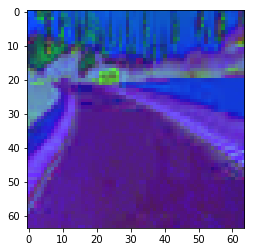

-0.3647059


In [95]:
whichline = 3500
filename = samples[whichline][0].split('/')[-1]
current_path = "./data/IMG/{}".format(filename)
steering = float(samples[whichline][3])
print(steering)
print(type(steering))
img = img_to_YUV(cv2.imread(current_path))
img = crop_resize(img)
img, steering = flip_vertical(img, steering)
plt.imshow(img)
plt.show()
print(steering)

In [7]:
train_samples, validation_samples = train_test_split(samples, test_size=0.2)

In [8]:
def generator(samples, batch_size=32):
    num_samples = len(samples)
    while 1:  # Loop forever so the generator never terminates
            sklearn.utils.shuffle(samples)
            for offset in range(0, num_samples, batch_size):
                batch_samples = samples[offset:offset + batch_size]

                images = []
                measurements = []
                for batch_sample in batch_samples:
                    for i in range(3):
                        # Source for image (center[0], left[1], right[2])
                        filename = line[i].split('/')[-1]
                        current_path = "./data/IMG/{}".format(filename)
                        # Image Color filter
                        img = img_to_YUV(cv2.imread(current_path))
                        # Getting steering correction for images left and right
                        correction = 0.25
                        steering = float(line[3])
                        if i == 1:
                            steering = steering + correction
                        elif i == 2:
                            steering = steering - correction
                        else:
                            steering = steering
                        # Augment a flip of the image
                        aug_img, aug_steering = flip_vertical(img, steering)
                        # Append all the images and measurements
                        images.extend((img, aug_img))
                        measurements.extend((steering, aug_steering))

                X_train = np.array(images)
                y_train = np.array(measurements)
                yield sklearn.utils.shuffle(X_train, y_train)